In [126]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

plt.get_backend()

car_insurance_df = pd.read_csv("Car_Insurance_Claim.csv", index_col='ID')

car_insurance_df = car_insurance_df.drop("Unnamed: 0", axis='columns')

num_cols = ["VEHICLE_OWNERSHIP", "MARRIED", "ANNUAL_MILEAGE", "SPEEDING_VIOLATIONS", "POSTAL_CODE", "DUIS", "PAST_ACCIDENTS", "OUTCOME"]
for col in num_cols:
    car_insurance_df[col] = pd.to_numeric(car_insurance_df[col], errors="coerce")

car_insurance_df[["CREDIT_SCORE", "VEHICLE_OWNERSHIP", "MARRIED", "CHILDREN", "SPEEDING_VIOLATIONS", "DUIS", "PAST_ACCIDENTS", "OUTCOME"]] = car_insurance_df[["CREDIT_SCORE", "VEHICLE_OWNERSHIP", "MARRIED", "CHILDREN", "SPEEDING_VIOLATIONS", "DUIS", "PAST_ACCIDENTS", "OUTCOME"]].replace('none', 0)

car_insurance_df["MARRIED"] = car_insurance_df["MARRIED"].replace([0.0, 1.0], [False, True])

car_insurance_df.fillna(car_insurance_df.median(numeric_only=True), inplace=True) 
car_insurance_df.fillna(car_insurance_df.mode().iloc[0], inplace=True) 

car_insurance_df.drop_duplicates(inplace=True)

car_insurance_df.head(20)

/var/folders/5q/817_6zy5137_h6wwwwxjf8n00000gn/T/ipykernel_57458/519584534.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_insurance_df.fillna(car_insurance_df.mode().iloc[0], inplace=True)


,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
ID,,,,,,,,,,,,,,,,,,
569520,65+,female,majority,0-9y,high school,upper class,0.629027313918201,1.0,after 2015,False,1.0,10238.0,12000.0,sedan,0.0,0.0,0.0,0.0
750365,16-25,male,majority,0-9y,none,poverty,0.3577571170184627,0.0,before 2015,False,0.0,10238.0,16000.0,sedan,0.0,0.0,0.0,1.0
199901,16-25,female,majority,0-9y,high school,working class,0.4931457852181982,1.0,before 2015,False,0.0,10238.0,11000.0,sedan,0.0,0.0,0.0,0.0
478866,16-25,male,majority,0-9y,university,working class,0.2060128507324556,1.0,before 2015,False,0,32765.0,11000.0,sedan,0.0,0.0,0.0,0.0
731664,26-39,male,majority,10-19y,none,working class,0.3883658881572184,1.0,before 2015,False,0.0,32765.0,12000.0,sedan,2.0,0.0,1.0,1.0
877557,40-64,female,majority,20-29y,high school,upper class,0.6191273725847388,1.0,after 2015,False,1.0,10238.0,13000.0,sedan,3.0,0.0,3.0,0.0
930134,65+,male,majority,30y+,high school,upper class,0.4929435502195342,0.0,after 2015,True,1.0,10238.0,13000.0,sedan,7.0,0.0,3.0,0.0
461006,26-39,female,majority,0-9y,university,working class,0.468689297434465,0.0,after 2015,False,1.0,10238.0,14000.0,sedan,0.0,0.0,0.0,1.0
68366,40-64,female,majority,20-29y,university,working class,0.5218149362971065,0.0,before 2015,True,0.0,10238.0,13000.0,sedan,0.0,0.0,0.0,0.0


In [127]:
car_insurance_df.describe()

,VEHICLE_OWNERSHIP,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000
mean,0.701463,19794.114907,11727.810058,1.469645,0.236926,1.048487,0.309657
std,0.457639,18881.900717,2670.373512,2.234977,0.553397,1.649674,0.462376
min,0.000000,10238.000000,2000.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,10238.000000,10000.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,10238.000000,12000.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,32765.000000,13000.000000,2.000000,0.000000,2.000000,1.000000
max,1.000000,92101.000000,22000.000000,22.000000,6.000000,15.000000,1.000000


In [128]:
car_insurance_df.describe(include="object")

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_YEAR,CHILDREN,VEHICLE_TYPE
count,9982,9982,9982,9982,9982,9982,9982,9982,9982,9982
unique,5,3,3,5,3,4,8929,3,3,3
top,26-39,female,majority,0-9y,high school,upper class,0,before 2015,1.0,sedan
freq,3084,5008,8950,3536,4158,4334,1054,6928,6859,9463


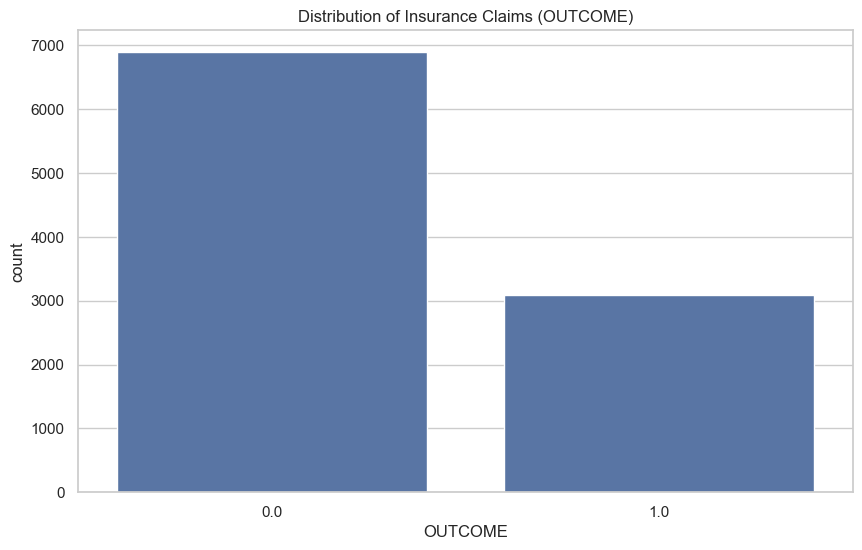

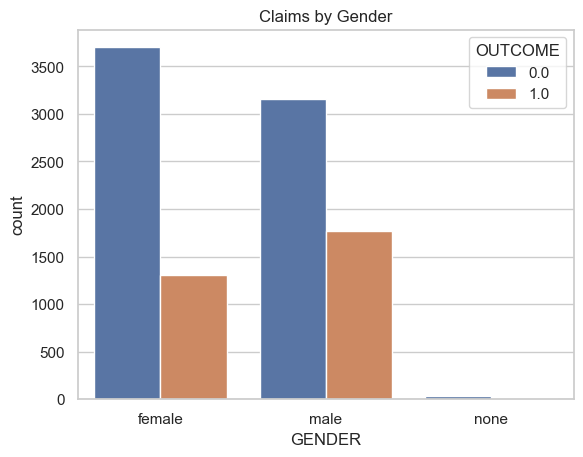

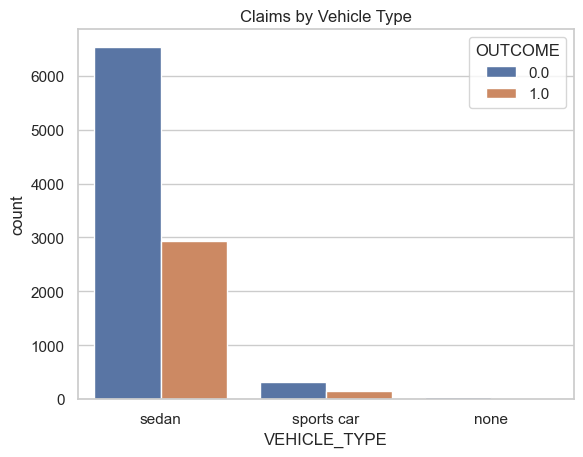

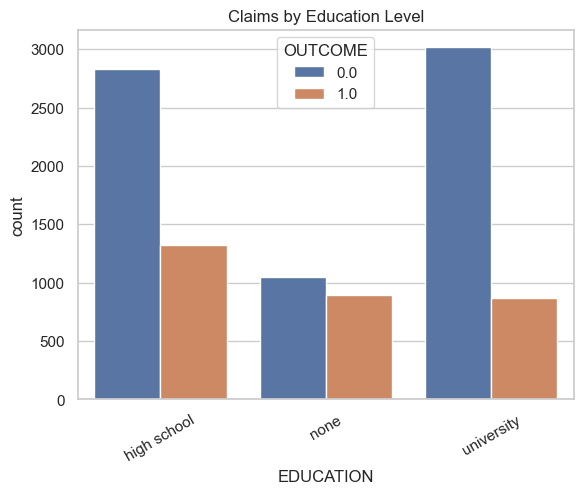

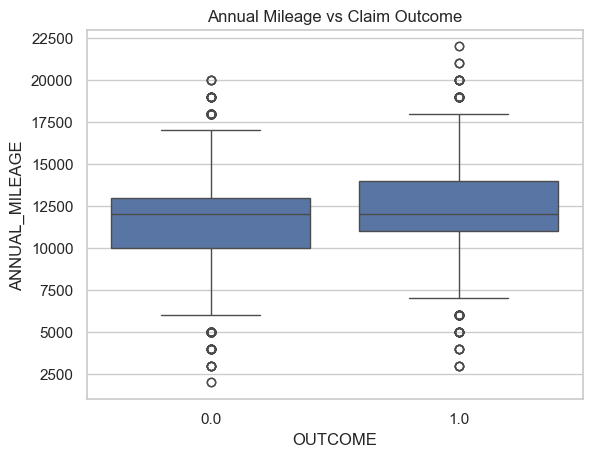

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.countplot(data=car_insurance_df, x="OUTCOME")
plt.title("Distribution of Insurance Claims (OUTCOME)")
plt.show()

sns.countplot(data=car_insurance_df, x="GENDER", hue="OUTCOME")
plt.title("Claims by Gender")
plt.show()

sns.countplot(data=car_insurance_df, x="VEHICLE_TYPE", hue="OUTCOME")
plt.title("Claims by Vehicle Type")
plt.show()

sns.countplot(data=car_insurance_df, x="EDUCATION", hue="OUTCOME")
plt.title("Claims by Education Level")
plt.xticks(rotation=30)
plt.show()

sns.boxplot(data=car_insurance_df, x="OUTCOME", y="ANNUAL_MILEAGE")
plt.title("Annual Mileage vs Claim Outcome")
plt.show()


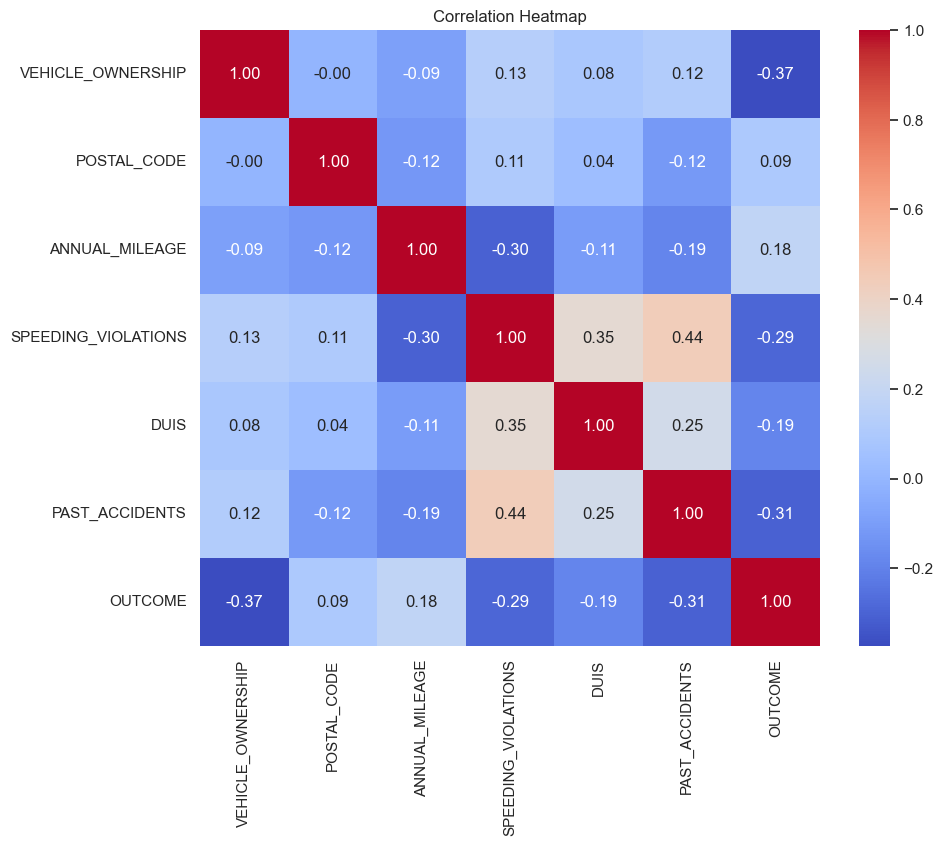

In [ ]:
plt.figure(figsize=(10, 8))
numeric_features = car_insurance_df.select_dtypes(include='number')
sns.heatmap(numeric_features.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()